In [1]:
import numpy as np

A = np.array([[ 3., -2.,  0.,  0.],
              [-2.,  4., -2.,  0.],
              [ 0., -2.,  6., -4.],
              [ 0.,  0., -4.,  4.]])

b = np.array([0,2,1,8])
u_vec = np.array([0,0,0,0.])
omega = 1.7


def MySOR(A,b,omega,u_vec):
    residual_convergence = 1e-10
    residual = np.linalg.norm(np.dot(A, u_vec) - b) #Initial residual
    iter_count = 0
   
    while residual > residual_convergence:
        iter_count+=1
        for i in range(4):
            sigma_i = 0
            for j in range(4):
                if j < i: # lower triangle elements
                    sigma_i += A[i][j] * u_vec[j]
                if j > i: # upper traignel elements
                    sigma_i += A[i][j] * u_vec[j]
            u_vec[i] = (1. - omega) * u_vec[i]  + omega * 1./A[i][i] * ( b[i] - sigma_i)
        #swap 
        residual = np.linalg.norm(np.dot(A, u_vec) - b)
    return [u_vec,residual,iter_count]


[u_vec,residual,iter_count] = MySOR(A,b,omega,u_vec)
print ("res = {:5.2e}".format(residual))
print ("u_vec = {}".format(u_vec))
print ("iter_count = {}".format(iter_count))




res = 9.68e-11
u_vec = [11.  16.5 21.  23. ]
iter_count = 74


In [11]:
# Input parameters

def FindBallPosition(k_vec, l_vec,mg_vec):
    k_01,k_12,k_23,k_34 = k_vec[0],k_vec[1],k_vec[2],k_vec[3] #N/m
    l_01,l_12,l_23,l_34 = l_vec[0],l_vec[1],l_vec[2],l_vec[3] #meters
    m1_g,m2_g,m3_g,m4_g = mg_vec[0],mg_vec[1],mg_vec[2],mg_vec[3] #N

    #=====
    A = np.array([[k_01+k_12, -k_12, 0,  0.],
                  [-k_12, k_12+k_23, -k_23, 0],
                  [0, -k_23, k_23+k_34, -k_34],
                  [ 0.,  0., -k_34, k_34]])


    #===b_vec
    b1 = m1_g + k_01 * l_01 - k_12 * l_12
    b2 = m2_g + k_12 * l_12 - k_23 * l_23
    b3 = m3_g + k_23 * l_23 - k_34 * l_34
    b4 = m4_g + k_34 * l_34
    b_vec = np.array([b1, b2, b3, b4])

    y_vec = np.array([100., 100., -1., 200.])
    [y_vec,residual,iter_count] = MySOR(A,b_vec,omega,y_vec)
    return y_vec
   
    
#=====
k_vec = np.array([1.,2.,1.,1.,])  # N/m
l_vec = np.array([1.,1.,1.,1.,]) # m
mg_vec = np.array([0.5,0.1,0.1,0.1]) # N
#==
y_vec = FindBallPosition(k_vec, l_vec,mg_vec)
print ("y_vec = {}".format(y_vec))

    



y_vec = [1.8  2.95 4.15 5.25]


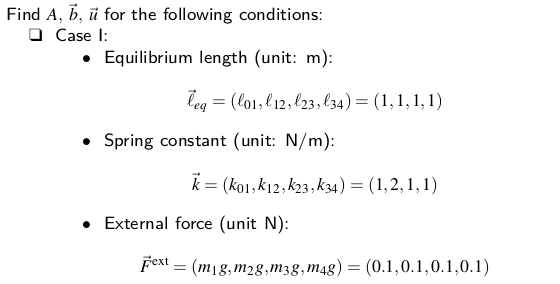